# Data visualisations

## Setup

### Imports

In [2]:
import titanic
from titanic.dataset import load_titanic_data

import numpy as np

import matplotlib.pyplot as plt

### Data loading

In [3]:
training_file = "../dataset/train.csv"

training_data = load_titanic_data(training_file)
print("Training data loaded. Number of records:", len(training_data))

Training data loaded. Number of records: 891


## Distributions

### Pie charts

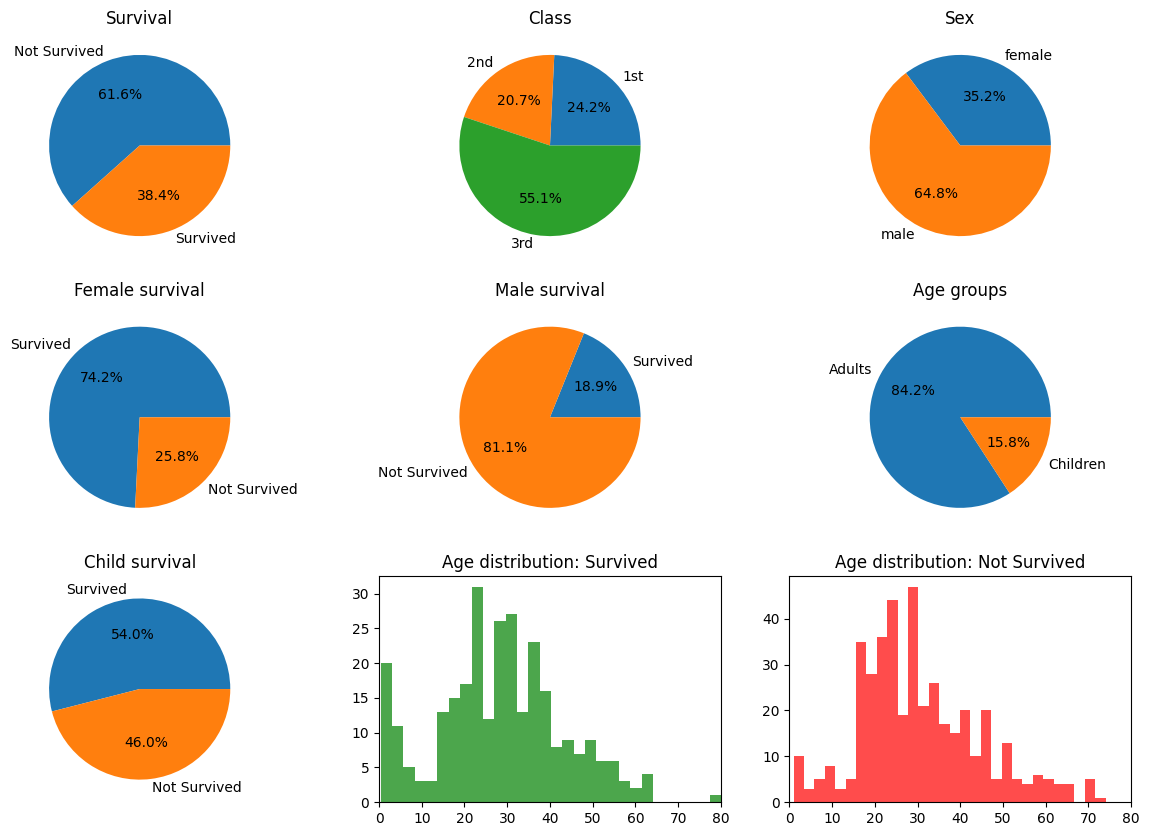

In [27]:
pclass_data = [int(person['Pclass']) for person in training_data]
sex_data = [person['Sex'] for person in training_data]
survived_data = [int(person['Survived']) for person in training_data]

female_survived = [person for person in training_data if person['Sex'] == 'female']
male_survived = [person for person in training_data if person['Sex'] == 'male']

adults = [person for person in training_data if person['Age'] and float(person['Age']) >= 18]
child = [person for person in training_data if person['Age'] and float(person['Age']) < 18]

child_survived = [person for person in child if person['Survived'] == '1']

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

survived_ax = axs[0][0]
survived_ax.set_title("Survival")
survived_ax.pie(
    [survived_data.count(0), survived_data.count(1)],
    labels=["Not Survived", "Survived"],
    autopct='%1.1f%%',
)

class_ax = axs[0][1]
class_ax.set_title("Class")
class_ax.pie(
    [pclass_data.count(i) for i in range(1, 4)], 
    labels=["1st", "2nd", "3rd"], 
    autopct='%1.1f%%',
)

sex_ax = axs[0][2]
sex_ax.set_title("Sex")
sex_ax.pie(
    [sex_data.count('female'), sex_data.count('male')],
    labels=["female", "male"],
    autopct='%1.1f%%',
)

female_survived_ax = axs[1][0]
female_survived_ax.set_title("Female survival")
female_survived_ax.pie(
    [len([female for female in female_survived if female['Survived'] == '1']), 
     len([female for female in female_survived if female['Survived'] == '0'])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

male_survived_ax = axs[1][1]
male_survived_ax.set_title("Male survival")
male_survived_ax.pie(
    [len([male for male in male_survived if male['Survived'] == '1']), 
     len([male for male in male_survived if male['Survived'] == '0'])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

child_adult_ax = axs[1][2]
child_adult_ax.set_title("Age groups")
child_adult_ax.pie(
    [len(adults), len(child)],
    labels=["Adults", "Children"],
    autopct='%1.1f%%',
)

child_survived_ax = axs[2][0]
child_survived_ax.set_title("Child survival")
child_survived_ax.pie(
    [len(child_survived), len(child) - len(child_survived)],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

age_hist_survived_ax = axs[2][1]
age_hist_survived_ax.set_title("Age distribution: Survived")
ages_survived = [float(person['Age']) for person in training_data if person['Age'] and person['Survived'] == '1']
age_hist_survived_ax.hist(ages_survived, bins=30, color='green', alpha=0.7)
age_hist_survived_ax.set(xlim=(0, 80), xticks=np.arange(0, 81, 10))

age_hist_not_survived_ax = axs[2][2]
age_hist_not_survived_ax.set_title("Age distribution: Not Survived")
ages_not_survived = [float(person['Age']) for person in training_data if person['Age'] and person['Survived'] == '0']
age_hist_not_survived_ax.hist(ages_not_survived, bins=30, color='red', alpha=0.7)
age_hist_not_survived_ax.set(xlim=(0, 80), xticks=np.arange(0, 81, 10))

plt.show()